![Colegio Bourbaki](./Images/Bourbaki.png)

## Rudimentos de Machine Learning

### Clasificación Multiclase

La clasificación multiclase es una tarea común en el aprendizaje automático, donde el objetivo es asignar una instancia a una de varias clases o categorías. A diferencia de la clasificación binaria, donde solo hay dos clases posibles, la clasificación multiclase implica tres o más clases entre las cuales una instancia puede ser clasificada. Este tipo de clasificación es fundamental en muchas aplicaciones del mundo real, como el reconocimiento de dígitos escritos a mano, donde cada dígito (0-9) representa una clase diferente, o la categorización de artículos de texto en varios temas.

En la clasificación multiclase, cada instancia se asigna a una y solo una de las varias clases. Por ejemplo, en un sistema de clasificación de empleados por su posición dentro de una empresa, cada empleado sería clasificado como 'Asistente', 'Ejecutivo', 'Gerente' o 'Director', pero no podría ser más de uno al mismo tiempo.

Hay varias estrategias para abordar problemas de clasificación multiclase con modelos que intrínsecamente solo manejan clasificación binaria, como:

* **One-vs-Rest (OvR) o One-vs-All(OvA):** Para cada clase, se entrena un clasificador binario que distingue entre esa clase y todas las demás. Durante la predicción, el clasificador que tenga la mayor confianza en su decisión determina la clase de la instancia.
* **One-vs-One (OvO):** Se entrena un clasificador binario para cada par de clases. Cuando se necesita hacer una predicción, se utiliza el voto mayoritario de los clasificadores entre todos los pares de clases.

Algunos algoritmos, como los árboles de decisión, kNN y ciertas variantes de SVM's, pueden manejar directamente la clasificación multiclase sin necesidad de estrategias adicionales como OvR u OvO.

La evaluación de modelos de clasificación multiclase también requiere métricas específicas, como la precisión multiclase, la matriz de confusión multiclase, y puntuaciones como el F1-score por clase, ya que métricas diseñadas para clasificación binaria, como la precisión o la curva ROC, no capturan la complejidad de predecir correctamente entre múltiples clases.

**Cómo funciona One-vs-Rest / One-vs-All:**

1) División del Problema: En un problema de clasificación con N clases, OvR/OvA crea N clasificadores binarios distintos.
2) Entrenamiento: Cada clasificador se entrena para distinguir una clase específica del resto. Por ejemplo, si tuvieras tres clases (A, B, C), entrenarías tres clasificadores:
* Clasificador 1: Clase A vs. Clases B y C
* Clasificador 2: Clase B vs. Clases A y C
* Clasificador 3: Clase C vs. Clases A y B
3) Predicción: Para hacer una predicción, todos los clasificadores binarios se ejecutan en la instancia no vista. La clase seleccionada es aquella para la cual el clasificador correspondiente tiene la mayor confianza en su predicción (por ejemplo, la mayor probabilidad en modelos probabilísticos).

Ventajas de OvR/OvA:

* Simplicidad: Es un enfoque sencillo que permite utilizar algoritmos de clasificación binaria, que son abundantes, en problemas multiclase.
* Escalabilidad: Aunque el número de clasificadores crece linealmente con el número de clases, este enfoque es relativamente fácil de escalar y paralelizar, ya que cada clasificador se puede entrenar de manera independiente.

Desventajas:

* Desequilibrio de Clases: Cada clasificador binario se enfrenta a un conjunto de datos desequilibrado, ya que la clase de interés suele ser mucho menor que el conjunto de todas las otras clases combinadas.
* Rendimiento: En algunos casos, especialmente cuando las clases no son mutuamente excluyentes en términos de características, otros enfoques como "One-vs-One" o métodos específicos multiclase pueden ofrecer un mejor rendimiento.

En resumen, One-vs-Rest/One-vs-All es una técnica ampliamente utilizada en clasificación multiclase debido a su simplicidad y efectividad en muchos escenarios, aunque siempre es recomendable evaluar diferentes enfoques para encontrar el más adecuado para un problema específico.

**Cómo funciona One-vs-One:**

1) División del Problema: Para un problema con N clases, OvO crea un clasificador binario para cada par de clases, resultando en N⋅(N−1)/2​ clasificadores. Por ejemplo, para 3 clases (A, B, C), se entrenarían 3 clasificadores:
* Clasificador 1: Clase A vs. Clase B
* Clasificador 2: Clase A vs. Clase C
* Clasificador 3: Clase B vs. Clase C

2) Entrenamiento: Cada clasificador se entrena solamente con los datos correspondientes a las dos clases que necesita distinguir, ignorando el resto.
3) Predicción: Para hacer una predicción sobre una nueva instancia, se consulta a todos los clasificadores binarios. La clase que gane la mayoría de los "duelos" binarios es la elegida como la predicción final.

Ventajas de OvO:

* Balance de Clases: Cada clasificador binario se entrena con dos clases, lo que puede ayudar a mitigar el problema del desequilibrio de clases presente en el enfoque OvR.
* Eficiencia en Espacios de Características Pequeños: Para datasets con pocas características pero muchas clases, OvO puede ser más eficiente ya que cada clasificador se entrena solo con un subconjunto de los datos.
* Rendimiento con Algoritmos Específicos: Algunos algoritmos que escalan mal con el tamaño del dataset (por ejemplo, SVM) pueden beneficiarse del enfoque OvO, ya que se entrena cada clasificador con menos datos.

Desventajas:

* Número de Clasificadores: El número de clasificadores crece cuadráticamente con el número de clases, lo que puede ser inmanejable para problemas con muchas clases.
* Costo Computacional: Aunque cada clasificador se entrena con menos datos, el costo total de entrenar y almacenar N⋅(N−1)/2​ clasificadores puede ser alto.
* Decisiones de Frontera: En algunas situaciones, especialmente cuando la instancia a clasificar cae cerca de la frontera entre tres o más clases, el método de votación mayoritaria puede resultar en ambigüedades o decisiones menos claras.

En resumen, One-vs-One es una estrategia efectiva para ciertos tipos de problemas y algoritmos de clasificación, especialmente en casos donde el balance de clases y la eficiencia de entrenamiento en espacios de características pequeños son consideraciones importantes. Sin embargo, el aumento cuadrático en el número de clasificadores necesarios hace que este enfoque sea menos práctico para problemas con un gran número de clases.

### Librerías

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Utils
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### Funciones de ayuda

In [2]:
def plot_correlation_matrix(dataframe, plot_graph=True, return_matrix=False):
    """
    Calculates and optionally plots the lower triangle (including the diagonal) of the correlation matrix 
    of a given DataFrame.
    
    Parameters:
    - dataframe: DataFrame from which to calculate the correlation matrix.
    - plot_graph: If True, displays a heatmap of the lower triangle of the correlation matrix.
    - return_matrix: If True, returns the correlation matrix.
    
    Returns:
    - If return_matrix is True, returns the correlation matrix of the dataframe.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataframe.corr('spearman')
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Plot the correlation matrix heatmap for the lower triangle if requested
    if plot_graph:
        plt.figure(figsize=(40, 30))
        # Use the mask and specify square=True to ensure the heatmap is square shaped
        sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, center=0, cmap="hot", annot=True, fmt=".2f", square=False)
        plt.xticks(rotation=45, horizontalalignment='right')
    
    # Return the correlation matrix if requested
    if return_matrix:
        return correlation_matrix

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,), True labels of the data.
    - y_pred: array-like of shape (n_samples,), Predicted labels.

    Returns:
    - None, displays a confusion matrix.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for Seaborn's heatmap
    class_labels = ["Assistant", "Director", "Executive", "Manager"]
    confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

    # Plotting the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_df, annot=True, fmt="g", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    print(classes)
    print("Los valores de las etiquetas de validación y_val son: ")
    print(pd.DataFrame(y_true).value_counts().to_dict())
  

In [4]:
def high_correlation_features(dataframe, threshold=0.95):
    """
    Identifies and returns pairs of highly correlated features from the given dataframe.

    Parameters:
    - dataframe: A pandas DataFrame containing the dataset.
    - threshold: A float representing the correlation threshold to identify high correlations.

    Returns:
    - A DataFrame with pairs of features that have a correlation coefficient above the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with a correlation above the threshold
    # Note: The matrix is symmetric, so we need to filter out one side to avoid duplicates
    high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .reset_index())
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corr_pairs = high_corr_pairs.loc[abs(high_corr_pairs['Correlation']) > threshold, :]

    return high_corr_pairs

### Configuraciones

In [5]:
pd.set_option("display.max_colwidth", 100)

### Carga de Datos

In [6]:
# Load the datasets
X_train = pd.read_csv("./Data/X_train_hYV2vs5.csv")
y_train = pd.read_csv("./Data/y_train_Ga8ie3n.csv")

In [7]:
# Display the first few rows of each dataset to understand their structure
X_train.head()

,Unnamed: 0,id,employee embedding,company embedding
0,0,0,"[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.1938832253...","[0.39761704206466675, 0.011816106736660004, 0.18756330013275146, 0.28075793385505676, -0.3438225..."
1,1,1,"[-0.2827381491661072, -0.012908441945910454, 0.20536786317825317, 0.4824570119380951, 0.28561165...","[0.31051310896873474, -0.33802372217178345, 0.023328864946961403, 0.6985604166984558, 0.55193680..."
2,2,2,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.1970466524362564, 0.062399972230196, 0.2565808594226837, 0.2552056312561035, -0.3004423379898..."
3,3,3,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.6501612067222595, -0.17757245898246765, 0.14481377601623535, 0.24889503419399261, 0.105174317..."
4,4,4,"[0.010124210268259048, 0.05761045217514038, -0.12174289673566818, 0.05773239582777023, 0.0840810...","[0.5966811180114746, -0.06162050738930702, 0.05697030574083328, 0.38894954323768616, -0.10050294..."


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29273 entries, 0 to 29272
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          29273 non-null  int64 
 1   id                  29273 non-null  int64 
 2   employee embedding  29273 non-null  object
 3   company embedding   29273 non-null  object
dtypes: int64(2), object(2)
memory usage: 914.9+ KB


In [9]:
y_train.head()

,Unnamed: 0,id,position
0,0,0,Executive
1,1,1,Executive
2,2,2,Executive
3,3,3,Executive
4,4,4,Executive


In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29273 entries, 0 to 29272
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29273 non-null  int64 
 1   id          29273 non-null  int64 
 2   position    29273 non-null  object
dtypes: int64(2), object(1)
memory usage: 686.2+ KB


### Análisis Exploratorio

Observemos como se presentan los encajes de los empleados y las empresas.

In [11]:
X_train["employee embedding"][0]

'[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.19388322532176971, 0.388049840927124, -0.0019527515396475792, -0.019566569477319717, 0.16178344190120697, 0.07337291538715363, -0.653967559337616, 0.4436742663383484, 0.8654799461364746, -0.4936961233615875, 0.6502818465232849, -0.6351300477981567, -0.5592029690742493, -0.7620808482170105, 0.9692695736885071, -0.4774521589279175, -0.41634371876716614, 0.8325812816619873, 0.43767035007476807, 0.08167269825935364, 0.626442551612854, 0.4704917371273041, -0.22233393788337708, 0.6111934185028076, -0.8858100175857544, -0.19638687372207642, -0.4154769778251648, -0.8892935514450073]'

Estan definidos como 'strings', aunque sin embargo dentro del string esta el encaje vectorial:

In [12]:
len(X_train["employee embedding"][4])

682

La longitud calculada arriba no es la dimension del embedding, es la cantidad de caracteres que hay dentro del 'string'. Por lo tanto necesitamos convertir esto a lista.

Veamos la distribución de las etiquetas:

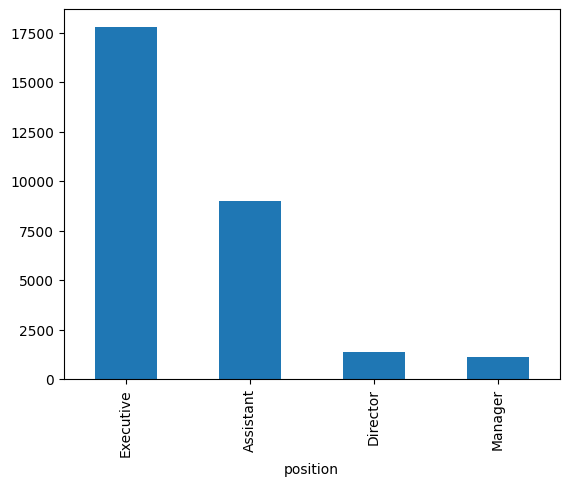

In [13]:
y_train["position"].value_counts().plot(kind="bar")
plt.show()

Como vemos es un dataset multiclase desbalanceado.

### Preprocesamiento

Vamos a quitar las columnas innecesarias.

In [14]:
# Drop the unnamed columns
X_train.drop(columns=["Unnamed: 0"], inplace=True)
y_train.drop(columns=["Unnamed: 0"], inplace=True)

Convertiremos el 'string' a lista con la función literal_eval de la librería ast (https://docs.python.org/3/library/ast.html)

El módulo ast ayuda a las aplicaciones Python a procesar árboles de la gramática de la sintaxis abstracta de Python. La propia sintaxis abstracta puede cambiar con cada versión de Python; este módulo ayuda a averiguar mediante programación cómo es la gramática actual.

In [15]:
# Convert string representations of the embeddings to actual lists
X_train["employee embedding"] = X_train["employee embedding"].apply(literal_eval)
X_train["company embedding"] = X_train["company embedding"].apply(literal_eval)

Ahora podemos calcular qué dimensión tienen los encajes:

In [16]:
print(
    f"El número de características de los empleados es: {len(X_train['employee embedding'][0])}"
)
print(
    f"El número de características de las empresas es: {len(X_train['company embedding'][0])}"
)

El número de características de los empleados es: 32
El número de características de las empresas es: 32


In [17]:
X_train.head()

,id,employee embedding,company embedding
0,0,"[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.1938832253...","[0.39761704206466675, 0.011816106736660004, 0.18756330013275146, 0.28075793385505676, -0.3438225..."
1,1,"[-0.2827381491661072, -0.012908441945910454, 0.20536786317825317, 0.4824570119380951, 0.28561165...","[0.31051310896873474, -0.33802372217178345, 0.023328864946961403, 0.6985604166984558, 0.55193680..."
2,2,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.1970466524362564, 0.062399972230196, 0.2565808594226837, 0.2552056312561035, -0.3004423379898..."
3,3,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.6501612067222595, -0.17757245898246765, 0.14481377601623535, 0.24889503419399261, 0.105174317..."
4,4,"[0.010124210268259048, 0.05761045217514038, -0.12174289673566818, 0.05773239582777023, 0.0840810...","[0.5966811180114746, -0.06162050738930702, 0.05697030574083328, 0.38894954323768616, -0.10050294..."


Los encajes fueron realizados por BERT, por lo tanto, no tenemos acceso a la información original. Entonces, lo que podemos hacer es tomar cada elemento del encaje como una variable latente (latent feature) y crear una nueva columna para cada uno de estos encajes.

In [18]:
# Expand each embedding into its own set of columns
employee_embeddings_expanded = X_train["employee embedding"].apply(pd.Series)
company_embeddings_expanded = X_train["company embedding"].apply(pd.Series)
ids = X_train["id"]

In [19]:
# You can add a prefix to column names to distinguish between them
employee_embeddings_expanded = employee_embeddings_expanded.add_prefix("employee_")
company_embeddings_expanded = company_embeddings_expanded.add_prefix("company_")

In [20]:
# Concatenate the expanded embeddings side-by-side
expanded_data = pd.concat([
    ids, employee_embeddings_expanded, company_embeddings_expanded], axis=1
)

In [21]:
expanded_data

,id,employee_0,employee_1,employee_2,employee_3,employee_4,employee_5,employee_6,employee_7,employee_8,...,company_22,company_23,company_24,company_25,company_26,company_27,company_28,company_29,company_30,company_31
0,0,0.013263,-0.376167,-0.613827,0.359729,0.193883,0.388050,-0.001953,-0.019567,0.161783,...,0.496415,-0.295326,0.294123,0.566333,-0.450409,0.667816,-0.907596,-0.421868,-0.320554,-0.404289
1,1,-0.282738,-0.012908,0.205368,0.482457,0.285612,-0.261424,0.602928,-0.176004,0.351918,...,0.534470,-0.209862,0.664622,0.539178,-0.367445,0.639607,-0.869631,-0.154816,0.075938,-0.639021
2,2,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,...,0.125662,0.140065,0.080729,0.233294,-0.238041,0.564176,-0.930845,-0.559797,0.103106,-0.149208
3,3,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,...,0.413645,-0.109720,0.322721,0.508323,-0.369104,0.496631,-0.881074,-0.056100,0.556903,-0.202640
4,4,0.010124,0.057610,-0.121743,0.057732,0.084081,-0.044404,0.155736,-0.125136,0.237426,...,0.416849,0.408343,0.337121,0.392495,-0.265649,0.664976,-0.922024,-0.505522,-0.364163,-0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29268,29268,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.625244,-0.479323,-0.614838,0.481588,-0.346560,-0.026151,-0.916651,-0.543107,-0.048471,-0.492233
29269,29269,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.668651,-0.014901,0.125109,0.722615,-0.437460,0.494184,-0.949057,-0.463338,-0.481801,-0.360249
29270,29270,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.520000,-0.045959,-0.213980,0.378754,-0.100366,0.681874,-0.956545,-0.178433,-0.328740,-0.499143
29271,29271,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.245802,0.419488,0.199170,0.412047,-0.004225,0.181359,-0.867206,-0.811884,0.004347,0.283375


Vamos a mostrar la distribución de cada característica latente:

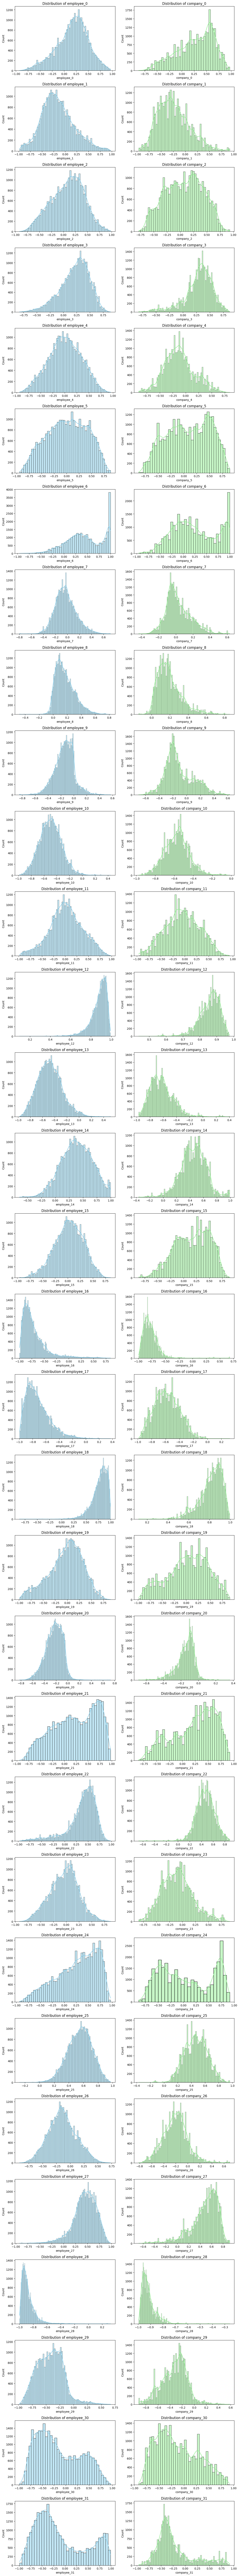

In [22]:
# Partition the features
employee_columns = [col for col in expanded_data.columns if col.startswith('employee_')]
company_columns = [col for col in expanded_data.columns if col.startswith('company_')]

# Set up the matplotlib figure (adjust figsize as needed)
f, axes = plt.subplots(len(employee_columns), 2, figsize=(12, 4 * len(employee_columns)))

# Plot each feature's distribution
for i, column in enumerate(employee_columns):
    sns.histplot(expanded_data[column], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Distribution of {column}')
    
    # Assuming the corresponding company column shares the same suffix
    corresponding_company_column = 'company_' + column.split('employee_')[1]
    if corresponding_company_column in company_columns:
        sns.histplot(expanded_data[corresponding_company_column], ax=axes[i, 1], kde=True, color='lightgreen')
        axes[i, 1].set_title(f'Distribution of {corresponding_company_column}')

plt.tight_layout()
plt.show()

Ahora, estos gráficos no nos dicen absolutamente nada, solo como se distribuyen las diferentes representaciones vectoriales para cada empleado y companía. Pero como sabemos qué son, es dificil decir o hacer algun tipo de comparación entre los encajes.

Concatenamos las columnas de encajes con las columnas de identificación.

In [23]:
data = pd.merge(expanded_data, y_train, on="id")

In [24]:
data.set_index("id", inplace=True)

In [25]:
data.head()

,employee_0,employee_1,employee_2,employee_3,employee_4,employee_5,employee_6,employee_7,employee_8,employee_9,...,company_23,company_24,company_25,company_26,company_27,company_28,company_29,company_30,company_31,position
id,,,,,,,,,,,,,,,,,,,,,
0,0.013263,-0.376167,-0.613827,0.359729,0.193883,0.388050,-0.001953,-0.019567,0.161783,0.073373,...,-0.295326,0.294123,0.566333,-0.450409,0.667816,-0.907596,-0.421868,-0.320554,-0.404289,Executive
1,-0.282738,-0.012908,0.205368,0.482457,0.285612,-0.261424,0.602928,-0.176004,0.351918,-0.483896,...,-0.209862,0.664622,0.539178,-0.367445,0.639607,-0.869631,-0.154816,0.075938,-0.639021,Executive
2,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,0.015427,...,0.140065,0.080729,0.233294,-0.238041,0.564176,-0.930845,-0.559797,0.103106,-0.149208,Executive
3,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,0.015427,...,-0.109720,0.322721,0.508323,-0.369104,0.496631,-0.881074,-0.056100,0.556903,-0.202640,Executive
4,0.010124,0.057610,-0.121743,0.057732,0.084081,-0.044404,0.155736,-0.125136,0.237426,-0.125507,...,0.408343,0.337121,0.392495,-0.265649,0.664976,-0.922024,-0.505522,-0.364163,-0.073651,Executive


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29273 entries, 0 to 29272
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_0   29273 non-null  float64
 1   employee_1   29273 non-null  float64
 2   employee_2   29273 non-null  float64
 3   employee_3   29273 non-null  float64
 4   employee_4   29273 non-null  float64
 5   employee_5   29273 non-null  float64
 6   employee_6   29273 non-null  float64
 7   employee_7   29273 non-null  float64
 8   employee_8   29273 non-null  float64
 9   employee_9   29273 non-null  float64
 10  employee_10  29273 non-null  float64
 11  employee_11  29273 non-null  float64
 12  employee_12  29273 non-null  float64
 13  employee_13  29273 non-null  float64
 14  employee_14  29273 non-null  float64
 15  employee_15  29273 non-null  float64
 16  employee_16  29273 non-null  float64
 17  employee_17  29273 non-null  float64
 18  employee_18  29273 non-null  float64
 19  employee_

Veamos la correlación entre las columnas:

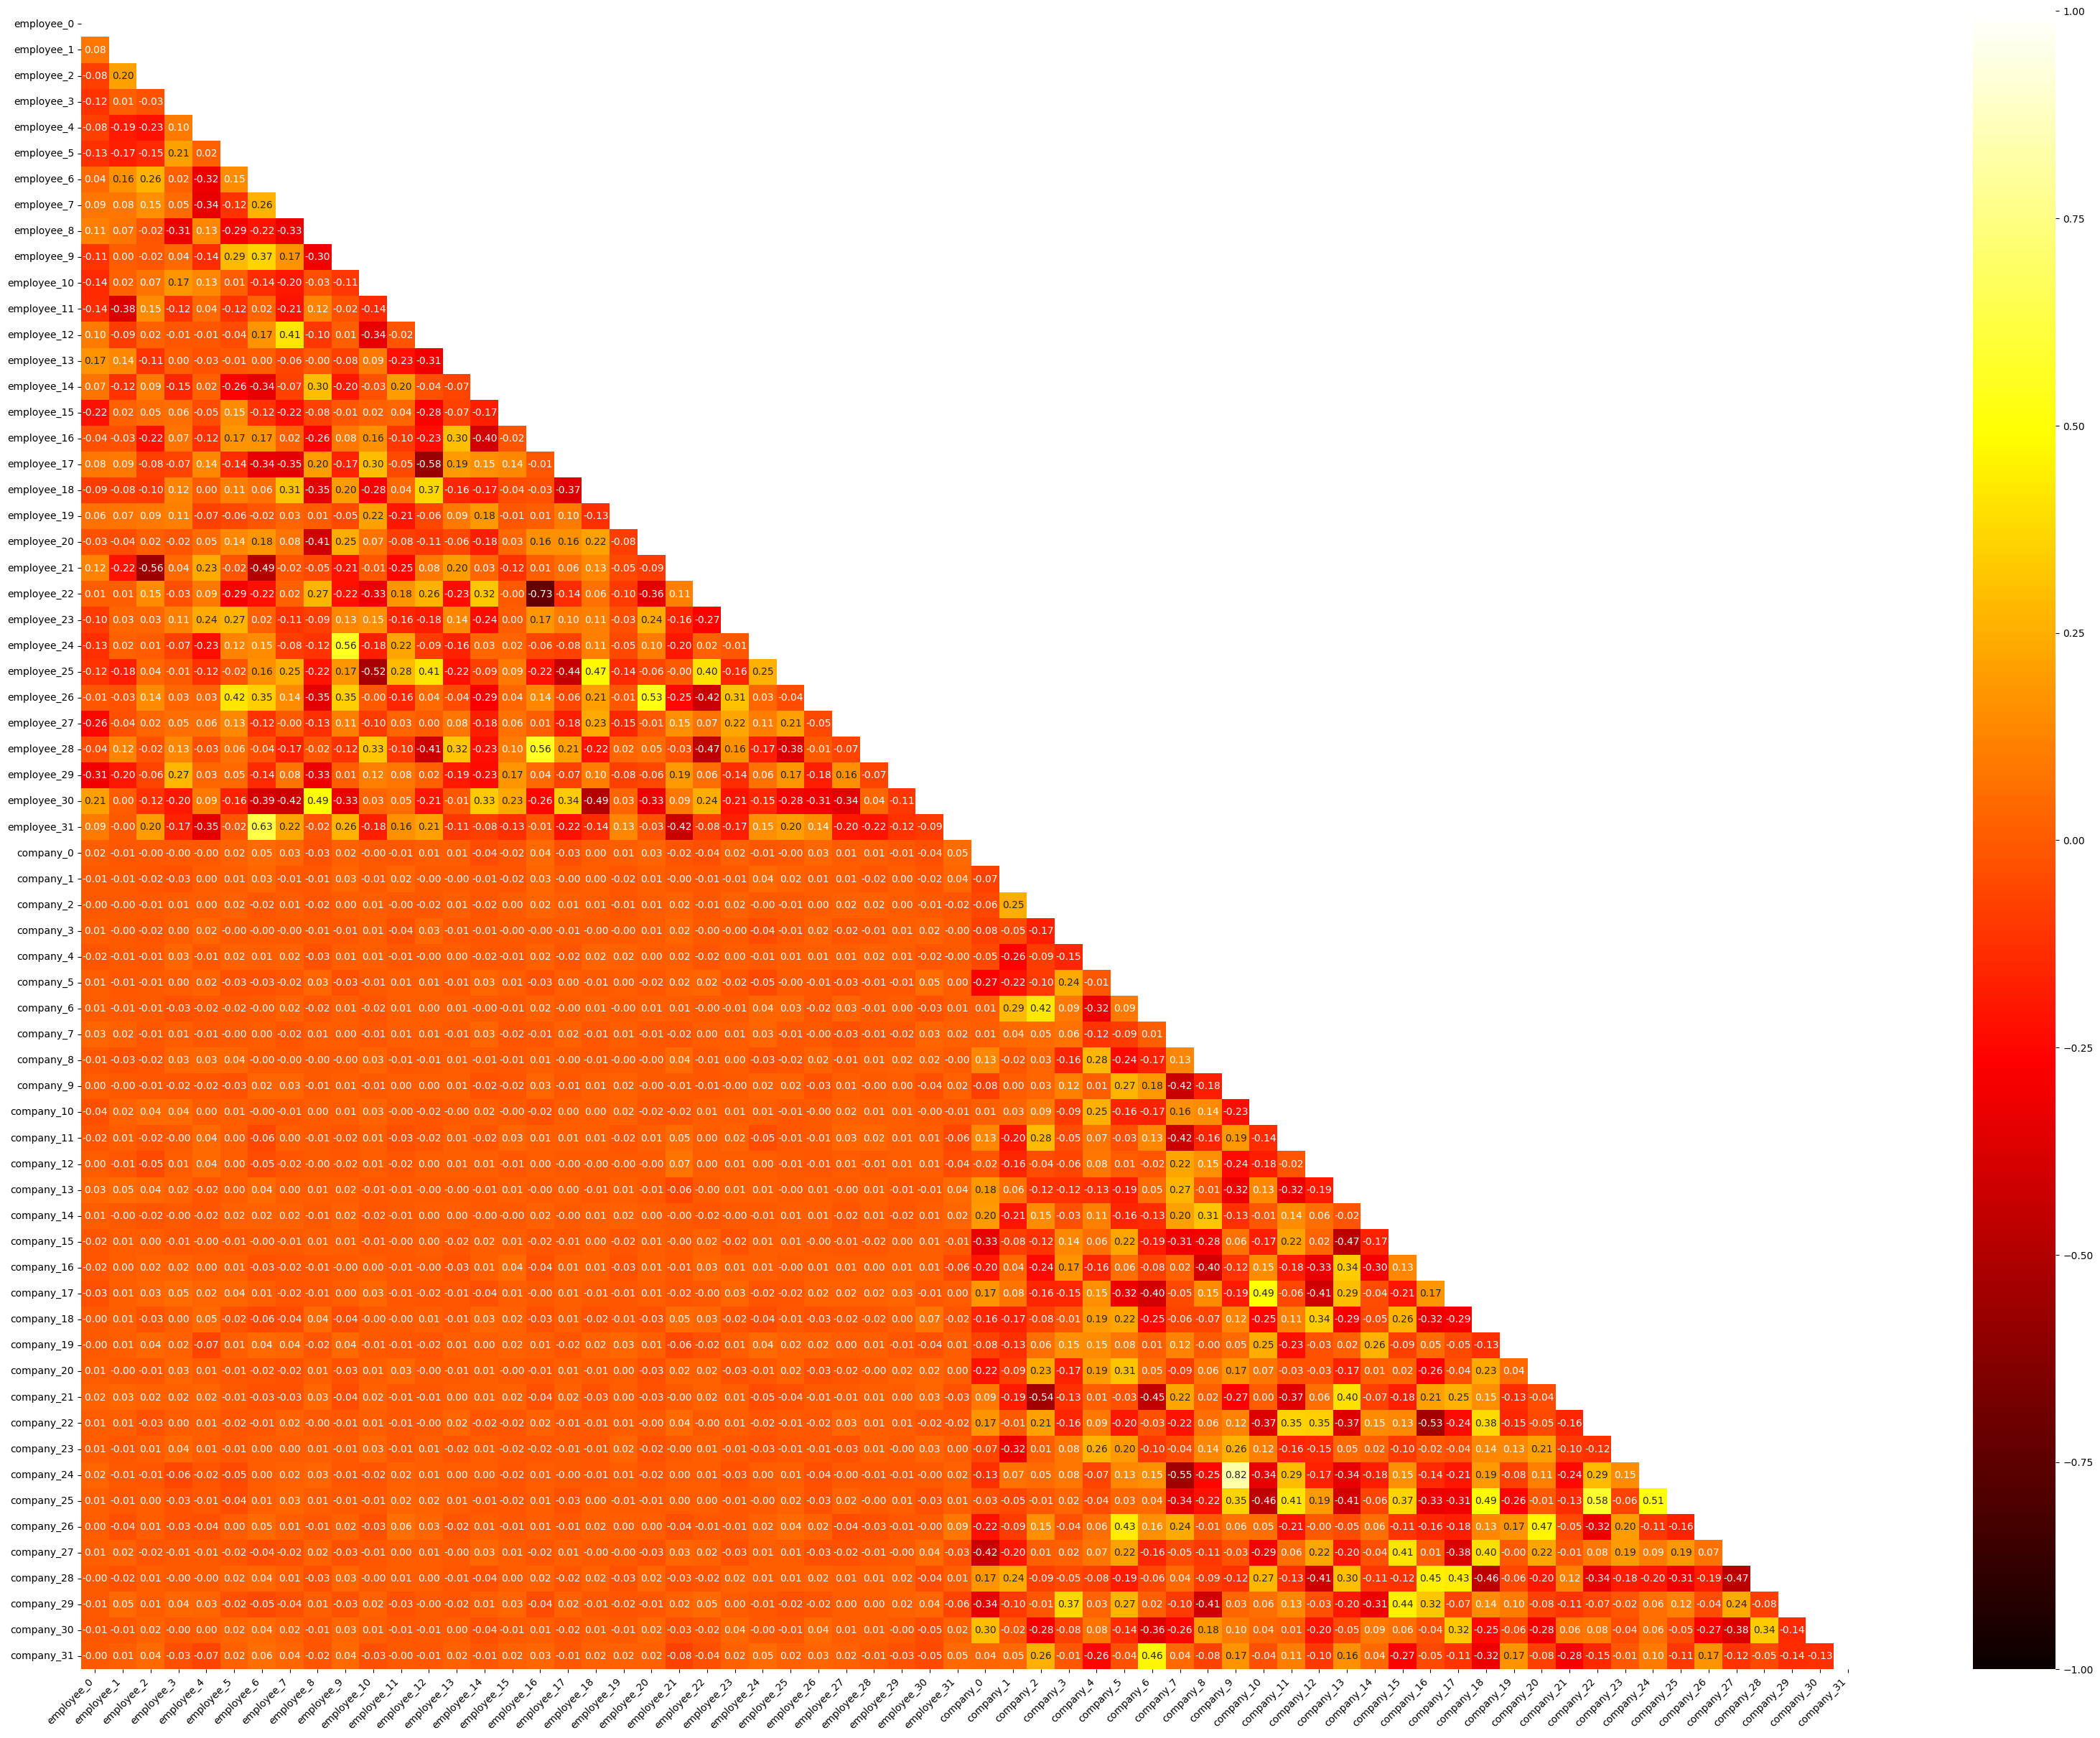

In [27]:
plot_correlation_matrix(data.drop(["position"], axis=1))

In [28]:
correlated_pairs = high_correlation_features(data.drop(["position"], axis=1))

In [29]:
correlated_pairs

,Feature 1,Feature 2,Correlation


No tenemos fuerte correlación entre las columnas.

Descomponemos en características y etiquetas:

In [30]:
# Prepare features and target variables
X = data.drop(["position"], axis=1)
y = data["position"].values

Codificamos las etiquetas en variables numéricas enteras:

In [31]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [32]:
dict_classes = dict(
    zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_)
)

In [33]:
dict_classes

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}

Normalizaremos las características:

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Realizamos la particación entre entrenamiento y validación:

In [35]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

# Display the shapes of the training and validation sets to confirm successful preprocessing
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23418, 64), (5855, 64), (23418,), (5855,))

### Pesos de las etiquetas

Si desea aplicar pesos de clase a un modelo de aprendizaje automático en scikit-learn, considerando que las clases tienen diferentes frecuencias y desea equilibrarlas, he aquí cómo podría enfocarlo basándose en sus datos:

* Usando "balanced": class_weight="balanced"

Si buscas un modo automático de equilibrar las clases en función de sus frecuencias, puedes utilizar la opción "balanced". Este modo ajusta automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos de entrada.

Se trata de un enfoque sencillo y a menudo eficaz cuando se trata de clases desequilibradas.


Si tiene conocimientos específicos sobre la importancia de cada puesto o si el equilibrio automático no produce resultados satisfactorios, puede optar por ponderaciones personalizadas. Digamos, por ejemplo, que su exploración de datos indica que los puestos de Asistente y Director están infrarrepresentados y, por lo tanto, se les debería dar más peso:


* class_weight = 
* {0: 2, # Assistant, más peso
* 1: 1, # Executive, peso estándar
* 2: 1, # Director, peso estándar
* 3: 3} # Manager, aún más peso

En esta ponderación personalizada, los puestos de Assistant y Manager se consideran más importantes para que el modelo los identifique correctamente, en comparación con los puestos de Executive y Director. Los valores exactos de ponderación deben determinarse en función de su conjunto de datos específico, utilizando potencialmente la validación cruzada para encontrar el esquema de ponderación más eficaz.

El calculo de los pesos de cada clase se hace de la siguiente manera en "balanced":

In [36]:
# Count the occurrences of each class
class_counts = Counter(y_train)

# Calculate the total number of samples
n_samples = len(y_train)

# Number of classes
n_classes = len(class_counts)

# Calculate the weight for each class
class_weights = {
    class_label: (n_samples / (n_classes * count))
    for class_label, count in class_counts.items()
}

In [37]:
class_weights

{0: 0.8138031693077564,
 2: 0.40977811996920277,
 1: 5.446046511627907,
 3: 6.791763341067285}

Este cálculo garantiza que las clases con frecuencias más bajas tengan un peso mayor, lo que las hace más importantes durante el entrenamiento de su modelo. La multiplicación por el número de clases garantiza que los pesos se normalicen en cierta medida, evitando que sean demasiado pequeños en conjuntos de datos con un gran número de muestras.

A continuación, puede pasar estos class_weights calculados al parámetro class_weight de los clasificadores en scikit-learn que lo soportan, como LogisticRegression, DecisionTreeClassifier, y otros.

Recuerde que la elección de la estrategia para calcular los pesos de clase puede depender de las características específicas de su conjunto de datos y de los objetivos de su tarea de modelado. El método anterior proporciona un enfoque equilibrado, pero puede necesitar ajustes en función de sus necesidades específicas o para hacer frente a desequilibrios extremos de clase.

### Clasificación

#### AdaBoost Clasification

El algoritmo AdaBoost, introducido por Freund y Schapire en 1997, revolucionó el modelado de conjuntos. Desde su creación, AdaBoost se ha convertido en una técnica ampliamente adoptada para abordar los retos de la clasificación binaria. Este potente algoritmo mejora la precisión de las predicciones transformando una multitud de aprendices débiles en aprendices fuertes y robustos.

El principio en el que se basan los algoritmos de boosting es que, en primer lugar, se construye un modelo sobre el conjunto de datos de entrenamiento y, a continuación, se construye un segundo modelo para rectificar los errores presentes en el primero. Este procedimiento continúa hasta que los errores se minimizan y el conjunto de datos se predice correctamente. Los algoritmos de refuerzo funcionan de forma similar: combinan varios modelos (aprendices débiles) para alcanzar el resultado final (aprendices fuertes).

In [42]:
# Initialize the AdaBoost classifier with a base estimator
ada_boost_cl = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=50,
    algorithm="SAMME",
    learning_rate=0.1, #Hay un trade-off entre el numero de estimadores y el learning rate
)

In [43]:
#Fit the classifier
ada_boost_cl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.1)

In [44]:
# Predict on the validation set
y_pred_ada = ada_boost_cl.predict(X_val)

In [45]:
print(classification_report(y_val, y_pred_ada))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1829
           1       0.32      0.31      0.32       281
           2       0.74      0.77      0.76      3506
           3       0.18      0.15      0.17       239

    accuracy                           0.67      5855
   macro avg       0.47      0.46      0.46      5855
weighted avg       0.66      0.67      0.66      5855



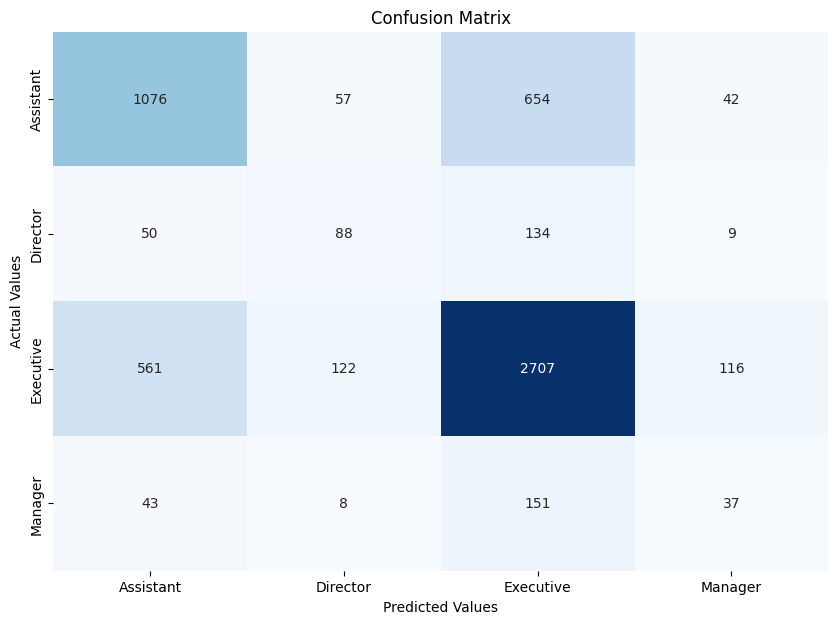

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [46]:
plot_confusion_matrix(y_val, y_pred_ada, dict_classes)

#### Multinomial Logistic Regression

Un enfoque alternativo a la Regresion Logística consiste en cambiar el modelo de regresión logística para que admita directamente la predicción de múltiples etiquetas de clase. En concreto, para predecir la probabilidad de que un ejemplo de entrada pertenezca a cada etiqueta de clase conocida.

La distribución de probabilidad que define las probabilidades multiclase se denomina distribución de probabilidad multinomial. Un modelo de regresión logística adaptado para aprender y predecir una distribución de probabilidad multinomial se denomina regresión logística multinomial. De forma similar, podríamos referirnos a la regresión logística estándar o por defecto como Regresión Logística Binomial.

* Regresión logística binomial: Regresión logística estándar que predice una probabilidad binomial (es decir, para dos clases) para cada ejemplo de entrada.
* Regresión logística multinomial: Versión modificada de la regresión logística que predice una probabilidad multinomial (es decir, más de dos clases) para cada ejemplo de entrada.

In [47]:
# Initialize and train the Logistic Regression model with the 'multinomial' option
mnr_cl = LogisticRegression(
    multi_class="multinomial",
    solver="newton-cg",
    max_iter=100,
    C=1, # Peso de la regularización L2
    class_weight='balanced',
    verbose=True,
)

In [48]:
mnr_cl.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial',
                   solver='newton-cg', verbose=True)

In [49]:
y_pred_mnr = mnr_cl.predict(X_val)

In [50]:
print(classification_report(y_val, y_pred_mnr))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42      1829
           1       0.09      0.41      0.15       281
           2       0.72      0.33      0.45      3506
           3       0.10      0.51      0.17       239

    accuracy                           0.37      5855
   macro avg       0.34      0.42      0.30      5855
weighted avg       0.57      0.37      0.42      5855



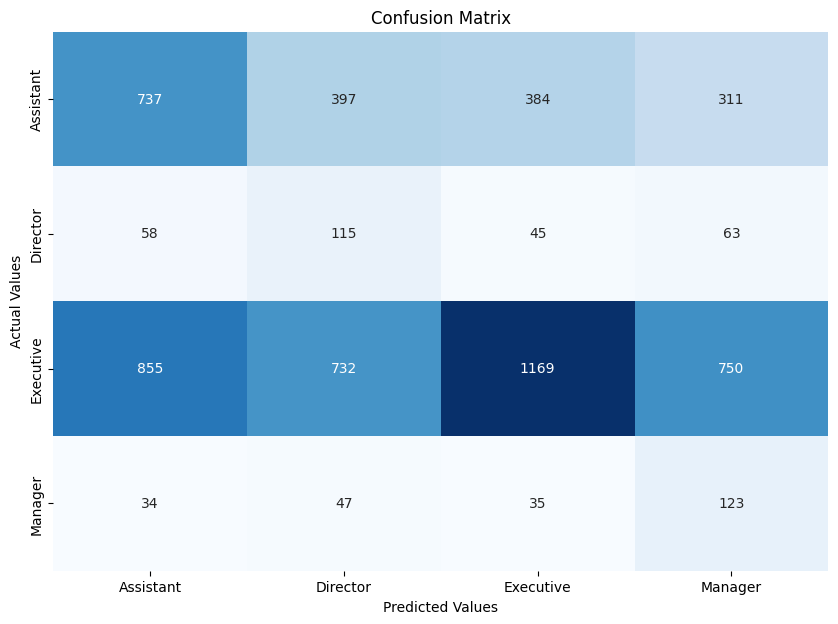

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [51]:
plot_confusion_matrix(y_val, y_pred_mnr, dict_classes)

#### Random Forest Classifier

Un Bosque Aleatorio es como un equipo de toma de decisiones en grupo en el aprendizaje automático. Combina las opiniones de muchos "árboles" (modelos individuales) para hacer mejores predicciones, creando un modelo global más sólido y preciso.

La popularidad generalizada del algoritmo Random Forest se debe a su facilidad de uso y su adaptabilidad, que le permiten abordar eficazmente problemas tanto de clasificación como de regresión. La fuerza del algoritmo reside en su capacidad para manejar conjuntos de datos complejos y mitigar el sobreajuste, lo que lo convierte en una herramienta valiosa para diversas tareas de predicción en el aprendizaje automático.

Una de las características más importantes del algoritmo Random Forest es que puede manejar conjuntos de datos que contienen variables continuas, como en el caso de la regresión, y variables categóricas, como en el caso de la clasificación. Se comporta mejor en tareas de clasificación y regresión.

In [52]:
# Initialize and train the Random Forest classifier
rf_cl = RandomForestClassifier(
    n_estimators=50, 
    class_weight='balanced', 
    verbose=True
)

In [53]:
rf_cl.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.3s


RandomForestClassifier(class_weight='balanced', n_estimators=50, verbose=True)

In [54]:
y_pred_rf = rf_cl.predict(X_val)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [55]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.55      0.67      1829
           1       0.88      0.26      0.40       281
           2       0.74      0.97      0.84      3506
           3       1.00      0.07      0.13       239

    accuracy                           0.77      5855
   macro avg       0.87      0.46      0.51      5855
weighted avg       0.80      0.77      0.73      5855



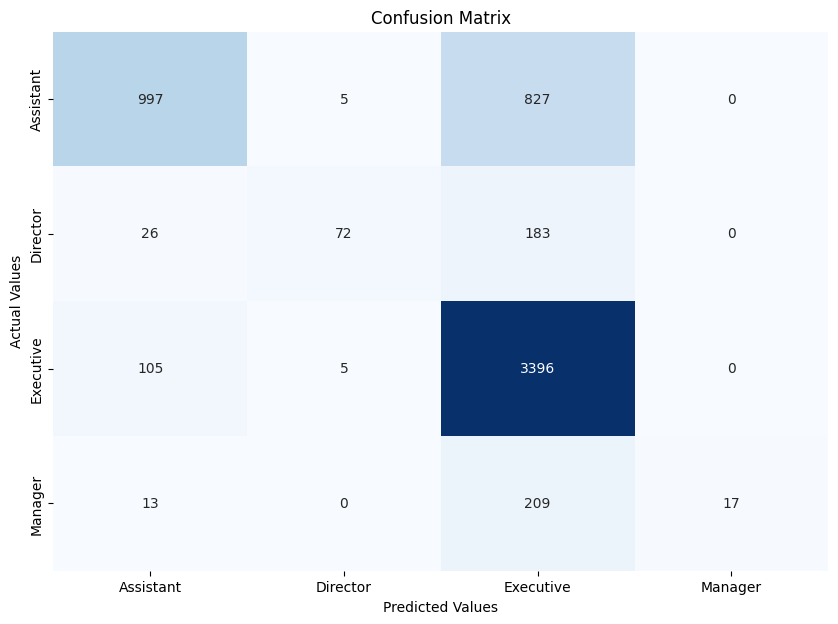

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [56]:
plot_confusion_matrix(y_val, y_pred_rf, dict_classes)

Ejercicio:

* Revisar las referencias y tratar de mejorar las matrices de confusión de los clasificadores. Correr la notebook en local.

### Referencias

* AdaBoost Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* AdaBoost Algorithm: Understand, Implement and Master AdaBoost: https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

* Multinomial Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Multinomial Logistic Regression With Python: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

* Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Understand Random Forest Algorithms With Examples (Updated 2024): https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

Veamos que sucede con CatBoost

In [ ]:
from catboost import CatBoostClassifier

# Note: Specify cat_features if you have any categorical features
model = CatBoostClassifier(
    iterations=1000,          # Number of trees to build
    learning_rate=0.001,        # Learning rate
    depth=10,                  # Depth of each tree
    loss_function='MultiClassOneVsAll',  # Use 'MultiClass' for multiclass classification
    verbose=100,              # Logging frequency
    eval_metric='TotalF1',   # Evaluation metric for validation data
    reg_lambda=0.01,           # L2 regularization parameter
    bagging_temperature=0.5, # Controls overfitting via bagging
    class_weights=class_weights
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),  # Providing validation set for early stopping / best model selection
    use_best_model=True,      # Save the best model observed during training
    early_stopping_rounds=100, # Stop training if the validation metric doesn't improve
    plot=True
)

In [76]:
y_pred_cat = model.predict(X_val)

In [77]:
print(classification_report(y_val, y_pred_cat))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67      1829
           1       0.90      0.22      0.35       281
           2       0.75      0.93      0.83      3506
           3       0.83      0.08      0.15       239

    accuracy                           0.75      5855
   macro avg       0.81      0.46      0.50      5855
weighted avg       0.76      0.75      0.73      5855



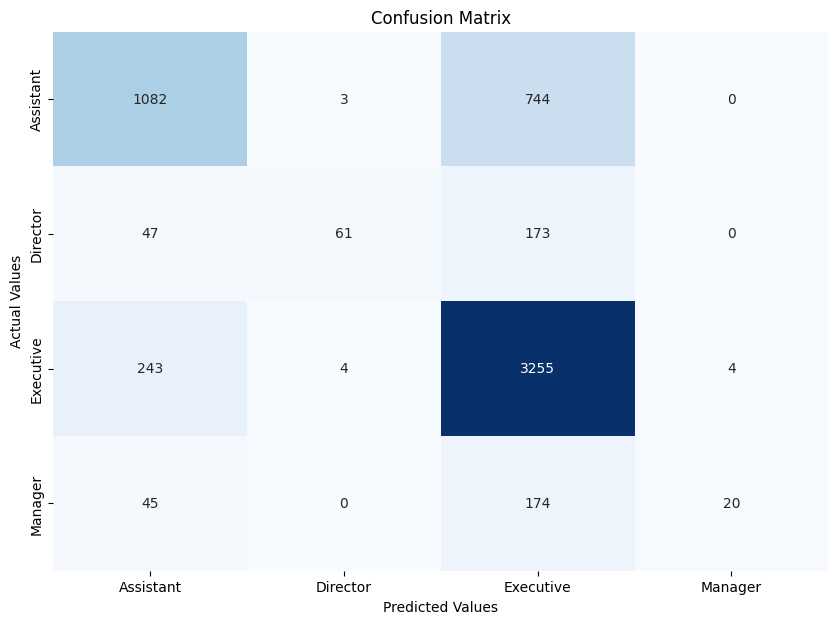

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [78]:
plot_confusion_matrix(y_val, y_pred_cat, dict_classes)

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)